In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
%matplotlib inline

Using TensorFlow backend.


In [2]:
seed=2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(x_train, y_train),(x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(-1,28,28,1).astype("float32")/255
x_test=x_test.reshape(-1,28,28,1).astype("float32")/255
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [4]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [5]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
modelpath=MODEL_DIR+"mnist-cnn.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath,monitor="val_loss",
                            verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [8]:
# 모델의 실행
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,
                  batch_size=200,
                  callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 49s 809us/step - loss: 0.2629 - accuracy: 0.9182 - val_loss: 0.0515 - val_accuracy: 0.9836

Epoch 00001: val_loss improved from inf to 0.05146, saving model to ./model/mnist-cnn.hdf5
Epoch 2/30
60000/60000 [==============================] - 48s 802us/step - loss: 0.0880 - accuracy: 0.9743 - val_loss: 0.0376 - val_accuracy: 0.9877

Epoch 00002: val_loss improved from 0.05146 to 0.03763, saving model to ./model/mnist-cnn.hdf5
Epoch 3/30
60000/60000 [==============================] - 49s 815us/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0357 - val_accuracy: 0.9878

Epoch 00003: val_loss improved from 0.03763 to 0.03567, saving model to ./model/mnist-cnn.hdf5
Epoch 4/30
60000/60000 [==============================] - 48s 792us/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0316 - val_accuracy: 0.9894

Epoch 00004: val_loss improved from 0.03567 to 0.03162, saving model 

In [9]:
del model

In [10]:
model = load_model('model/mnist-cnn.hdf5')

In [11]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy: 0.9915


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

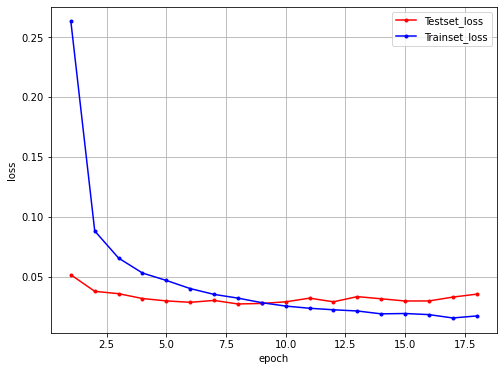

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()